<a href="https://www.kaggle.com/code/dtrade84/madden-24-player-ratings-analysis?scriptVersionId=154225012" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

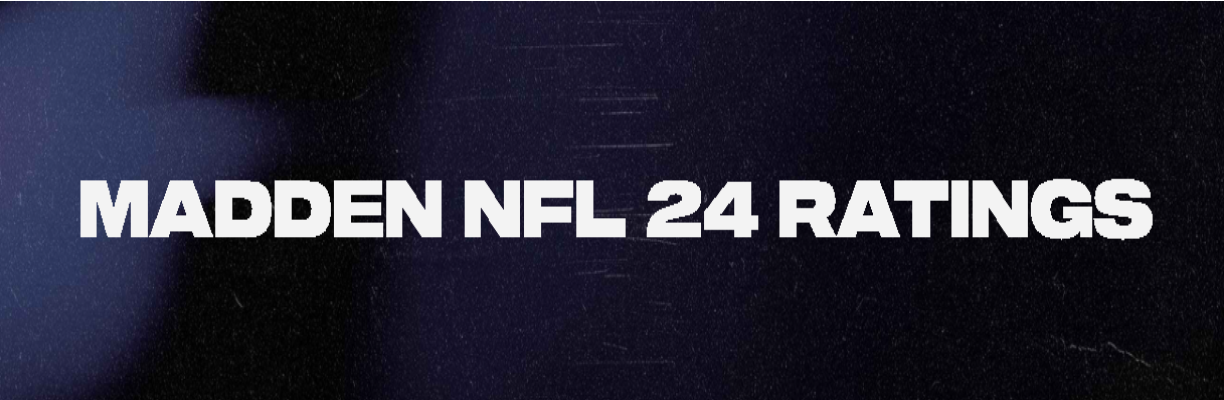

# Madden 24 Player Ratings Analysis #
***

# Table of Contents
***

1. [Inroduction](#intro)

2. [Reading in the Data](#readdata)

    * [Importing Libraries](#import)
    
    * [Reading in the CSV](#readcsv)
    
    * [Viewing the Data](#viewdata)

3. [Cleaning the Data](#cleandata)

    * [Removing Columns](#removecol)
    
    * [Renaming Columns](#renamecol)
    
    * [Searching for Duplicates](#duplicates)
    
4. [Exploring The Data](#exploredata)

    
    

<a id='intro'></a>
# Introduction
***

Player rating analysis of the Madden 24 Player Ratings dataset.

<a id='readdata'></a>

# Reading in the Data
***

In this section we will import the libraries needed for analysis.

Then we will read in the dataset, and afterwards we look look at some basic information about the dataset.

<a id='import'></a>

## Importing Libraries


First we will import the libraries necessary.

This is done by using the import function.

In [1]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/madden-24-player-ratings/maddennfl24fullplayerratings.xlsx
/kaggle/input/madden-24-player-ratings/maddennfl24fullplayerratings.csv


<a id='readcsv'></a>
## Reading in the CSV

Next we will read in the csv file using Pandas read_csv() function.

In [2]:
# Reading in the csv.

df = pd.read_csv('/kaggle/input/madden-24-player-ratings/maddennfl24fullplayerratings.csv')


<a id='viewdata'></a>
## Viewing The Data

In [3]:
# Viewing the data.

pd.options.display.max_columns = None
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,24,30,22,22,21,45,45,77,19,75,10,88,74,86,34,66,26,27,21,22,77,45,45,45,45,25,16,14,64,55,66,82,69,23,29,17,17,14,5,5,76,20,17,6,6,6,6,6,76,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,56,61,23,18,12,45,45,81,35,93,10,91,81,83,35,74,50,34,44,53,69,45,45,45,45,22,12,10,46,51,66,77,57,56,62,41,41,15,5,5,77,46,13,6,6,6,6,6,72,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,76,69,25,12,10,59,56,50,64,79,10,90,85,88,69,74,77,64,58,65,64,56,59,56,52,54,16,15,27,29,49,52,36,21,27,77,73,66,62,54,47,25,61,15,10,5,5,10,77,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,77,74,21,20,19,38,35,67,57,84,83,84,90,76,48,83,80,47,65,76,53,35,35,35,35,10,12,17,32,41,56,82,89,76,85,75,73,52,42,37,82,78,49,6,6,6,6,6,72,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,63,61,21,17,14,45,45,78,27,87,10,82,75,76,27,69,44,39,48,50,74,45,45,45,45,21,12,16,68,72,67,78,63,43,50,53,54,40,30,25,84,28,33,6,6,6,6,6,77,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


As we can see there is 5 rows and 80 columns in the dataset.

Next, we will check for any null values.

In [4]:
# Using info function to check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  2369 non-null   object
 1   Position              2369 non-null   object
 2   Full Name             2369 non-null   object
 3   Overall Rating        2369 non-null   int64 
 4   Jersey Number         2369 non-null   int64 
 5   Speed                 2369 non-null   int64 
 6   Acceleration          2369 non-null   int64 
 7   Strength              2369 non-null   int64 
 8   Agility               2369 non-null   int64 
 9   Awareness             2369 non-null   int64 
 10  Catching              2369 non-null   int64 
 11  Carrying              2369 non-null   int64 
 12  Throw Power           2369 non-null   int64 
 13  Kick Power            2369 non-null   int64 
 14  Kick Accuracy         2369 non-null   int64 
 15  Run Block             2369 non-null   

As we can see there are no null values in the dataset.

Now, we will lok at some basic statistics about this dataset.

In [5]:
# Using describe function to view some basic statistics about the dataset

df.describe()

,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Total Salary,Signing Bonus
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2.369000e+03,2.369000e+03
mean,69.988181,48.095821,80.518362,83.211904,71.710848,76.368088,70.374420,55.279443,54.807514,30.316589,22.210215,19.390882,46.414099,44.697763,52.311102,41.829464,80.283664,31.786408,88.232165,83.344871,83.330097,40.914310,71.168003,51.099620,41.531026,45.877585,51.084002,61.623048,42.806669,42.775855,42.056564,41.437315,36.014352,19.833263,17.845504,34.009287,33.986492,45.579147,55.262136,45.076826,31.482482,36.153229,47.038413,44.322921,34.362178,28.914310,25.687632,51.674968,30.468974,32.717180,18.072604,15.559308,13.854369,13.726045,15.980160,74.094977,243.569016,25.916843,35502.728577,3.420431,6.273856e+06,4.701942e+06
std,9.694438,29.998939,10.355249,9.914619,12.309682,11.467658,11.260897,20.712774,18.173667,15.901733,15.240877,13.080830,16.111137,17.069235,21.771519,24.768089,8.972776,25.929331,3.956281,6.194525,6.666522,17.036671,13.699495,25.489966,18.467763,24.405763,26.175766,20.012669,17.283475,17.953981,18.136919,17.911321,23.686700,13.867756,14.751166,23.296686,22.495078,19.332084,23.135655,25.922230,23.388731,23.506139,24.486047,23.657608,22.845704,24.244162,24.035419,25.508806,23.782126,21.400762,18.674912,16.866250,16.333656,16.590090,17.633708,3.038855,47.941674,2.945351,1279.775500,2.875312,1.361592e+07,1.144004e+07
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,0.000000e+00
25%,64.000000,22.000000,73.000000,77.000000,62.000000,68.000000,63.000000,35.000000,40.000000,22.000000,16.000000,13.000000,35.000000,35.000000,33.000000,18.000000,75.000000,10.000000,86.000000,80.000000,80.000000,29.000000,58.000000,26.000000,30.000000,22.000000,26.000000,46.000000,34.000000,33.000000,32.000000,30.000000,18.000000,12.000000,10.000000,10.000000,10.000000,28.000000,33.000000,20.000000,12.000000,16.000000,22.000000,21.000000,15.000000,8.000000,5.000000,28.000000,10.000000,15.000000,6.000000,6.000000,6.000000,6.000000,6.000000,72.000000,202.000000,24.000000,34948.000000,1.000000,1.010000e+06,0.000000e+00
50%,

Now that we know what the data looks like we can move onto the next section, cleaning the dataset.

<a id='cleandata'></a>
# Cleaning the Data
***

In this section we will clean the dataset.

We will be removing unecessary columns, and renaming them.

We will also search for duplicates and remove those as well.

<a id='removecol'></a>
## Removing Columns

First, we will remove any columns we do not need.

We will acheive this using the drop function.

In [6]:
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,24,30,22,22,21,45,45,77,19,75,10,88,74,86,34,66,26,27,21,22,77,45,45,45,45,25,16,14,64,55,66,82,69,23,29,17,17,14,5,5,76,20,17,6,6,6,6,6,76,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,56,61,23,18,12,45,45,81,35,93,10,91,81,83,35,74,50,34,44,53,69,45,45,45,45,22,12,10,46,51,66,77,57,56,62,41,41,15,5,5,77,46,13,6,6,6,6,6,72,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,76,69,25,12,10,59,56,50,64,79,10,90,85,88,69,74,77,64,58,65,64,56,59,56,52,54,16,15,27,29,49,52,36,21,27,77,73,66,62,54,47,25,61,15,10,5,5,10,77,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,77,74,21,20,19,38,35,67,57,84,83,84,90,76,48,83,80,47,65,76,53,35,35,35,35,10,12,17,32,41,56,82,89,76,85,75,73,52,42,37,82,78,49,6,6,6,6,6,72,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,63,61,21,17,14,45,45,78,27,87,10,82,75,76,27,69,44,39,48,50,74,45,45,45,45,21,12,16,68,72,67,78,63,43,50,53,54,40,30,25,84,28,33,6,6,6,6,6,77,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


Looks like all the columns could be useful.

Removing any is not neccessary. 

In [7]:
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,24,30,22,22,21,45,45,77,19,75,10,88,74,86,34,66,26,27,21,22,77,45,45,45,45,25,16,14,64,55,66,82,69,23,29,17,17,14,5,5,76,20,17,6,6,6,6,6,76,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,56,61,23,18,12,45,45,81,35,93,10,91,81,83,35,74,50,34,44,53,69,45,45,45,45,22,12,10,46,51,66,77,57,56,62,41,41,15,5,5,77,46,13,6,6,6,6,6,72,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,76,69,25,12,10,59,56,50,64,79,10,90,85,88,69,74,77,64,58,65,64,56,59,56,52,54,16,15,27,29,49,52,36,21,27,77,73,66,62,54,47,25,61,15,10,5,5,10,77,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,77,74,21,20,19,38,35,67,57,84,83,84,90,76,48,83,80,47,65,76,53,35,35,35,35,10,12,17,32,41,56,82,89,76,85,75,73,52,42,37,82,78,49,6,6,6,6,6,72,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,63,61,21,17,14,45,45,78,27,87,10,82,75,76,27,69,44,39,48,50,74,45,45,45,45,21,12,16,68,72,67,78,63,43,50,53,54,40,30,25,84,28,33,6,6,6,6,6,77,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


<a id='renamecol'></a>
## Renaming the Columns

No need to rename columns.

In [8]:
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,24,30,22,22,21,45,45,77,19,75,10,88,74,86,34,66,26,27,21,22,77,45,45,45,45,25,16,14,64,55,66,82,69,23,29,17,17,14,5,5,76,20,17,6,6,6,6,6,76,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,56,61,23,18,12,45,45,81,35,93,10,91,81,83,35,74,50,34,44,53,69,45,45,45,45,22,12,10,46,51,66,77,57,56,62,41,41,15,5,5,77,46,13,6,6,6,6,6,72,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,76,69,25,12,10,59,56,50,64,79,10,90,85,88,69,74,77,64,58,65,64,56,59,56,52,54,16,15,27,29,49,52,36,21,27,77,73,66,62,54,47,25,61,15,10,5,5,10,77,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,77,74,21,20,19,38,35,67,57,84,83,84,90,76,48,83,80,47,65,76,53,35,35,35,35,10,12,17,32,41,56,82,89,76,85,75,73,52,42,37,82,78,49,6,6,6,6,6,72,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,63,61,21,17,14,45,45,78,27,87,10,82,75,76,27,69,44,39,48,50,74,45,45,45,45,21,12,16,68,72,67,78,63,43,50,53,54,40,30,25,84,28,33,6,6,6,6,6,77,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


Next, we search for duplicates.

<a id='duplicates'></a>
## Searching for Duplicates

In [9]:
# Searching for duplicates

sum(df.duplicated())


0

As we can see there are no duplicates.

Now we finally have a clean dataset.

Onto exploring the dataset.

<a id='exploredata'></a>
# Exploring the Data
***

In this section we will further explore the dataset.

We will be using some statistics, as well as some regression techniques to reveal trends in the data, if any.

In [10]:
df.head()

,Team,Position,Full Name,Overall Rating,Jersey Number,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Kick Power,Kick Accuracy,Run Block,Pass Block,Tackle,Break Tackle,Jumping,Kick Return,Injury,Stamina,Toughness,Trucking,Change Of Direction,Ball Carrier Vision,Stiff Arm,Spin Move,Juke Move,Impact Blocking,Run Block Power,Run Block Finesse,Pass Block Power,Pass Block Finesse,Lead Block,Break Sack,Throw Under Pressure,Power Moves,Finesse Moves,Block Shedding,Pursuit,Play Recognition,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Short Route Running,Medium Route Running,Deep Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Mid,Throw Accuracy Deep,Play Action,Throw On The Run,Height,Weight,Age,Birthdate,Years Pro,Running Style,Archetype,College,Total Salary,Signing Bonus,Player Handness
0,Broncos,DT,Jordan Jackson,64,90,74,74,78,76,67,24,30,22,22,21,45,45,77,19,75,10,88,74,86,34,66,26,27,21,22,77,45,45,45,45,25,16,14,64,55,66,82,69,23,29,17,17,14,5,5,76,20,17,6,6,6,6,6,76,294,25,35825,1,Long Stride Awkward,DT_RunStopper,Air Force,750000,0,Right
1,Buccaneers,MLB,Ulysees Gilbert III,63,57,87,91,68,82,60,56,61,23,18,12,45,45,81,35,93,10,91,81,83,35,74,50,34,44,53,69,45,45,45,45,22,12,10,46,51,66,77,57,56,62,41,41,15,5,5,77,46,13,6,6,6,6,6,72,230,26,35651,4,Default Stride Loose,MLB_FieldGeneral,Akron,1080000,0,Right
2,49ers,TE,Cameron Latu,65,81,80,84,73,74,69,76,69,25,12,10,59,56,50,64,79,10,90,85,88,69,74,77,64,58,65,64,56,59,56,52,54,16,15,27,29,49,52,36,21,27,77,73,66,62,54,47,25,61,15,10,5,5,10,77,244,23,36580,0,Long Stride Default,TE_VerticalThreat,Alabama,4440000,840000,Right
3,Bears,FS,Eddie Jackson,85,4,91,89,63,85,90,77,74,21,20,19,38,35,67,57,84,83,84,90,76,48,83,80,47,65,76,53,35,35,35,35,10,12,17,32,41,56,82,89,76,85,75,73,52,42,37,82,78,49,6,6,6,6,6,72,206,29,34313,6,Default Stride High and Tight,S_Zone,Alabama,39350000,19770000,Right
4,Bears,MLB,Terrell Lewis,63,52,83,88,74,83,66,63,61,21,17,14,45,45,78,27,87,10,82,75,76,27,69,44,39,48,50,74,45,45,45,45,21,12,16,68,72,67,78,63,43,50,53,54,40,30,25,84,28,33,6,6,6,6,6,77,262,25,36032,3,Long Stride Loose,MLB_RunStopper,Alabama,1010000,0,Right


In [11]:
# Creating function to plot histogram's faster

def rate_hist(column):
    df.hist(column)
    

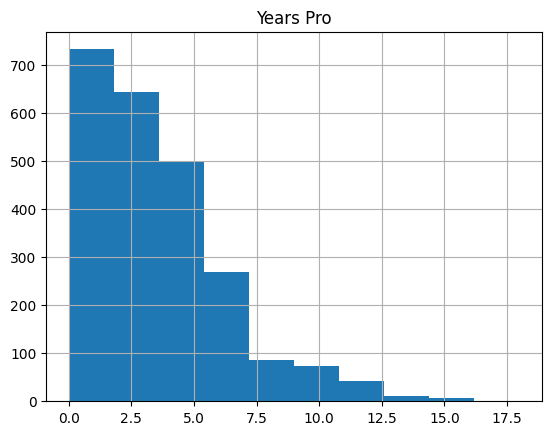

In [12]:
rate_hist('Years Pro')

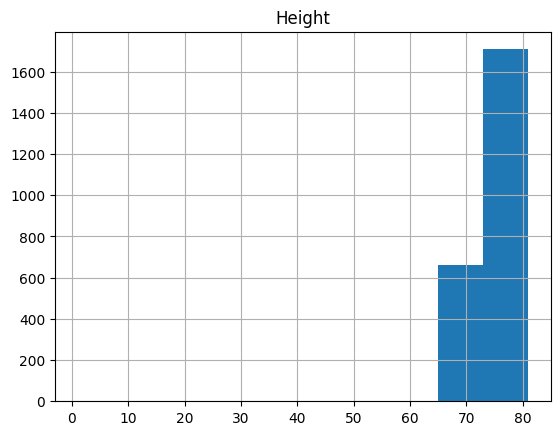

In [13]:
rate_hist('Height')

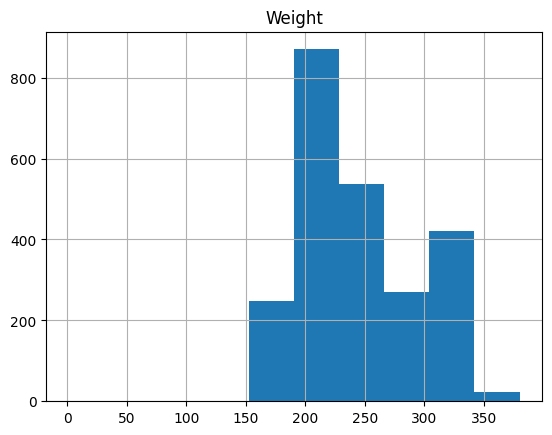

In [14]:
rate_hist('Weight')

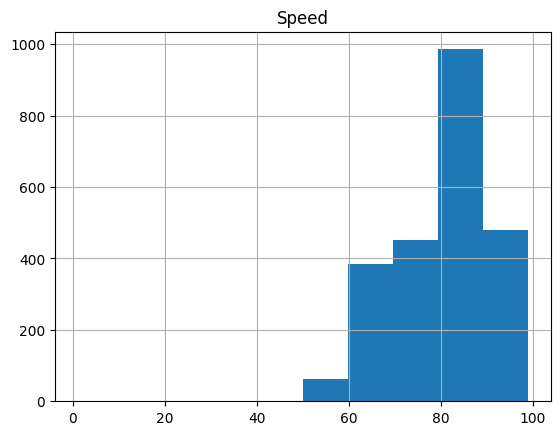

In [15]:
rate_hist('Speed')

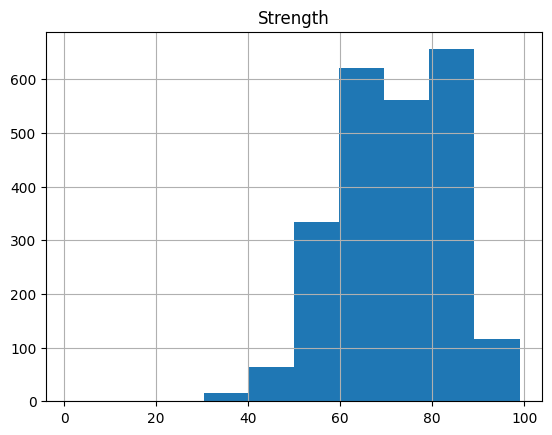

In [16]:
rate_hist('Strength')

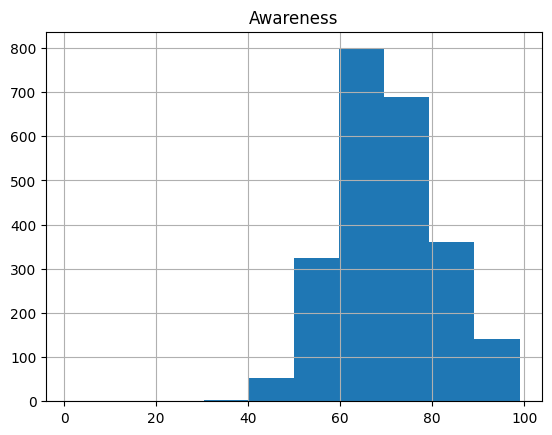

In [17]:
rate_hist('Awareness')

# WORK IN PROGRESS... #